# Chapter 8 Exercises

## Exercise 9

Load MNIST dataset\
Split into train/test 60,000/10,000\
Train Random Forest Classifier. Time how long it takes. Evaluate on test set\
Use PCA to reduce dimensionality with explained variance ratio of 95%\
Train new Random Forest calssifier on reduced datate. See how long it takes. Evaluate on test set.\
How does it compare to previous classifier?

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
import time
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [10]:
print(f'Time to train: {t1 - t0:0.02f}s')

Time to train: 41.247s


In [8]:
from sklearn.metrics import mean_squared_error

rnd_pred = rnd_clf.predict(X_test)
MSE = mean_squared_error(y_test, rnd_pred)
print(f'Mean squared error: {MSE:0.03f}')

Mean squared error: 0.600


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [26]:
pca.n_components_

154

In [27]:
rnd_clf_red = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rnd_clf_red.fit(X_reduced, y_train)
t1 = time.time()

print(f'Time to train on reduced data set: {t1 - t0:0.02f}s')

Time to train on reduced data set: 81.51s


In [28]:
X_test_red = pca.transform(X_test)
rnd_pred_red = rnd_clf_red.predict(X_test_red)
MSE_red = mean_squared_error(y_test, rnd_pred_red)
print(f'Mean squared error: {MSE: 0.03f}')

Mean squared error:  0.600


In [32]:
from sklearn.metrics import accuracy_score

rnd_for = accuracy_score(y_test, rnd_pred)
rnd_for_red = accuracy_score(y_test, rnd_pred_red)

print(f'Random forest classifier accuracy: Original: {rnd_for:0.02f} Reduced: {rnd_for_red:0.02f}')

Random forest classifier accuracy: Original: 0.97 Reduced: 0.95


In [33]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

C:\Users\nbwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print(f'Time to train: {t1-t0:0.03f}')

Time to train: 21.140


In [36]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [38]:
log_clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
t0 = time.time()
log_clf2.fit(X_reduced, y_train)
t1 = time.time()

C:\Users\nbwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print(f'Time to train: {t1-t0:0.03f}')

Time to train: 7.344


In [40]:
y_pred = log_clf2.predict(X_test_red)
accuracy_score(y_test, y_pred)

0.9201

## Exercise 10

Exercise: Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.

In [3]:
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

In [10]:
y = y.astype(np.uint8)

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [6]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

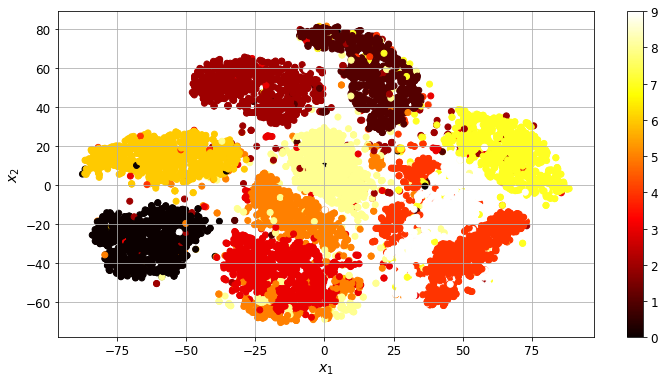

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = y, cmap=plt.cm.hot)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar()
plt.grid(True)
plt.show()